<a href="https://colab.research.google.com/github/Trosadventures/QUANTITATIVE23/blob/main/ML_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

## ARMA in Python


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

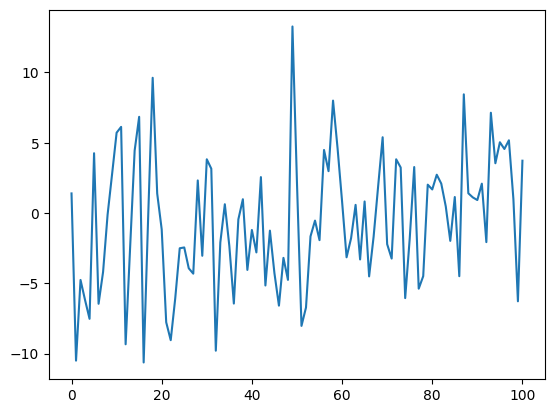

In [ ]:
unif_1 = np.random.rand(101)
white_noise = stats.norm.ppf(unif_1,0,5)
plt.plot(white_noise);

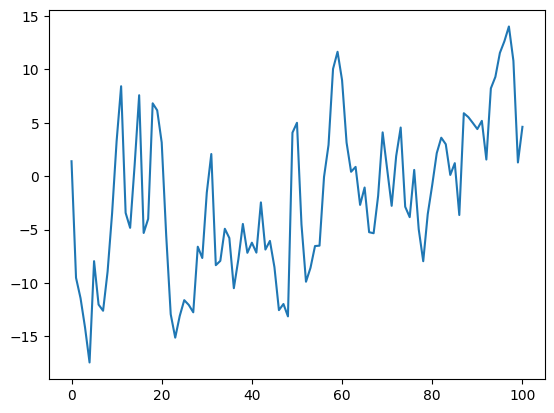

In [ ]:
# AR(1) with phi_0 = 0 and phi_1 = 0.7 based on the previous gaussian white noise

phi_1 = 0.7
AR_1 = np.zeros(101)
AR_1[0] = white_noise[0]

for i in range(100):
  AR_1[i+1] = AR_1[i] * phi_1 + white_noise[i+1]

plt.plot(AR_1)

In [ ]:
model_arima = ARIMA(white_noise, order=(0,0,0),
                    trend='n').fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  101
Model:                          ARIMA   Log Likelihood                -300.564
Date:                Tue, 28 Nov 2023   AIC                            603.127
Time:                        16:54:02   BIC                            605.742
Sample:                             0   HQIC                           604.186
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        22.5081      3.394      6.632      0.000      15.856      29.160
Ljung-Box (L1) (Q):                   2.46   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.12   Pr

In [ ]:
stats.norm.ppf(0.975,0,1)*3.448 + 25.9069

32.66485581869411

order_tuple = (1,0,0)

In [ ]:
model_arima = ARIMA(AR_1, order=(1,0,0)).fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  101
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -299.719
Date:                Tue, 28 Nov 2023   AIC                            605.437
Time:                        16:54:17   BIC                            613.283
Sample:                             0   HQIC                           608.613
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8826      1.887     -0.998      0.318      -5.581       1.815
ar.L1          0.7540      0.073     10.341      0.000       0.611       0.897
sigma2        21.9511      3.543      6.196      0.0

In [ ]:
model_arima.pvalues

array([1.46346252e-02, 1.84676766e-08, 6.34095653e-15])

In [ ]:
model_arima.params

array([-2.76525832,  0.56542273, 24.55616381])

In [ ]:
model_arima.forecast()

array([-3.90178958])

In [ ]:
model_arima.params[1]*(AR_1[-1] - model_arima.params[0]) + model_arima.params[0]

-3.9017895787600727

## Bias-variance tradeoff




# Y = Function(x) + e
# x uniform (5,5)

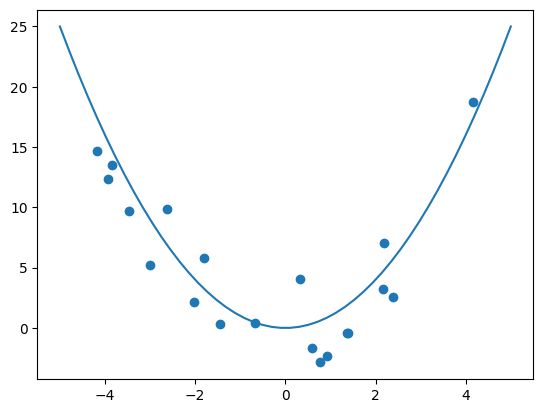

In [ ]:
N = 20
x = 10 * np.random.rand(N) - 5
def true_f(x):
  return x**2
error_noise = 8*np.random.rand(N) - 4
y = true_f(x) + error_noise

plt.scatter(x,y)
plt.plot(np.linspace(-5,5,50),true_f(np.linspace(-5,5,50)));

#Y is the name of the dataframe
#y is the python variable that we want to assign

In [ ]:
df = pd.DataFrame({'Y': y,
                   'X': x})

# Y = B0 + B1X + u


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('Y ~ X',
                data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.141
Date:                Tue, 28 Nov 2023   Prob (F-statistic):              0.161
Time:                        16:59:07   Log-Likelihood:                -63.348
No. Observations:                  20   AIC:                             130.7
Df Residuals:                      18   BIC:                             132.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6535      1.387      3.355      0.0

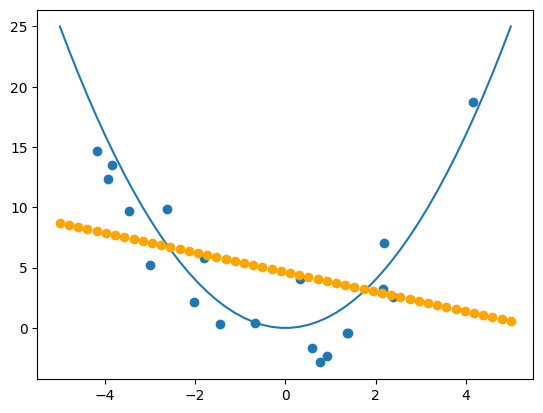

In [ ]:
df_pred = pd.DataFrame({'X': np.linspace(-5,5,50)})
y_pred = model.predict(df_pred)
plt.scatter(x,y)
plt.plot(np.linspace(-5,5,50),true_f(np.linspace(-5,5,50)))
plt.plot(np.linspace(-5,5,50),y_pred,'o', color='orange');

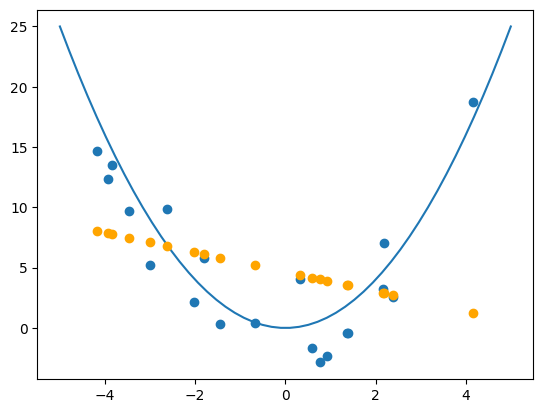

In [ ]:
df_pred = pd.DataFrame({'X': np.linspace(-5,5,50)})
y_pred = model.predict(df)
plt.scatter(x,y)
plt.plot(np.linspace(-5,5,50),true_f(np.linspace(-5,5,50)))
plt.plot(df[['X']],y_pred,'o', color='orange');

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     14.79
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           0.000116
Time:                        17:23:17   Log-Likelihood:                -37.863
No. Observations:                  20   AIC:                             95.73
Df Residuals:                      10   BIC:                             105.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.2932      1.828      1.

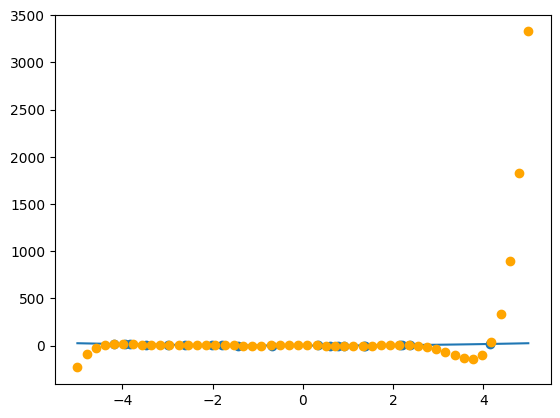

In [ ]:
model = smf.ols('Y ~ X + np.power(X,2) + np.power(X,3) + np.power(X,4) + np.power(X,5) + np.power(X,6) + np.power(X,7) + np.power(X,8) + np.power(X,9)',
                data=df).fit()
print(model.summary())

df_pred = pd.DataFrame({'X': np.linspace(-5,5,50)})
y_pred = model.predict(df_pred)
plt.scatter(x,y)
plt.plot(np.linspace(-5,5,50),true_f(np.linspace(-5,5,50)))
plt.plot(np.linspace(-5,5,50),y_pred,'o', color='orange');

# For the previous graph there is too much variance, too flexible

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     40.01
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.16e-07
Time:                        17:24:42   Log-Likelihood:                -43.069
No. Observations:                  20   AIC:                             94.14
Df Residuals:                      16   BIC:                             98.12
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.7580      0.770     -0.

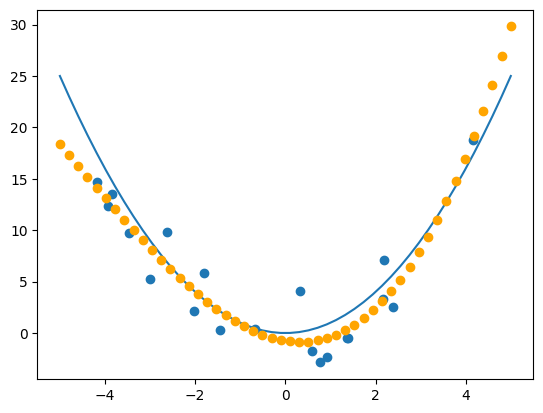

In [ ]:
string = 'Y ~ X + np.power(X,2) + np.power(X,3)'
model = smf.ols(string,
                data=df).fit()
print(model.summary())

df_pred = pd.DataFrame({'X': np.linspace(-5,5,50)})
y_pred = model.predict(df_pred)
plt.scatter(x,y)
plt.plot(np.linspace(-5,5,50),true_f(np.linspace(-5,5,50)))
plt.plot(np.linspace(-5,5,50),y_pred,'o', color='orange');

# Simple linear regression - too much bias
# Polynomial regression order 9- Too much variance
# Polynomial regression order 3- good balance between bias

In [ ]:
models = ['Y ~ X',
          'Y ~ X + np.power(X,2)',
          'Y ~ X + np.power(X,2) + np.power(X,3)',
          'Y ~ X + np.power(X,2) + np.power(X,3) + np.power(X,4)',
          'Y ~ X + np.power(X,2) + np.power(X,3) + np.power(X,4) + np.power(X,5)',
          'Y ~ X + np.power(X,2) + np.power(X,3) + np.power(X,4) + np.power(X,5) + np.power(X,6)',
          'Y ~ X + np.power(X,2) + np.power(X,3) + np.power(X,4) + np.power(X,5) + np.power(X,6) + np.power(X,7)',
          'Y ~ X + np.power(X,2) + np.power(X,3) + np.power(X,4) + np.power(X,5) + np.power(X,6) + np.power(X,7) + np.power(X,8)',
          'Y ~ X + np.power(X,2) + np.power(X,3) + np.power(X,4) + np.power(X,5) + np.power(X,6) + np.power(X,7) + np.power(X,8) + np.power(X,9)']
for mod in models:
    model = smf.ols(mod,
                data=df).fit()
    print(model.rsquared)
    #print(model.bic)

0.10631362889943063
0.8572543961503883
0.8823788222007659
0.8824767232782275
0.8860332692140401
0.8869050383254733
0.8876189163241075
0.8904712495004298
0.9301161220546955
